#### Titanic Spaceship Dataset  ####

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
test_data1 = test_data.copy()

In [3]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
#Concatinating test and train data, so that pre processing steps can be applied together, later we will be separating 
#on basis of Test dataset: Nan values present in target feature (Transported)
df = pd.concat([train_data,test_data1],axis=0)

In [6]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
#Passenger ID , Name not required to analysis so dropping them
df.drop(['PassengerId','Name'],axis=1,inplace=True)

In [8]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [9]:
df.isnull().sum()

HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Transported     4277
dtype: int64

In [10]:
df.shape

(12970, 12)

In [11]:
df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [12]:
df['HomePlanet'].fillna('Missing',inplace=True)

In [13]:
df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', 'Missing'], dtype=object)

In [14]:
#Applying encoding using map function
#0 value given to missing to give less importance
df['HomePlanet'] = df['HomePlanet'].map({'Missing': 0 , 'Earth' : 1 , 'Europa' : 2, 'Mars' : 3})

In [15]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,2,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,1,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,2,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,2,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,1,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [16]:
df.isnull().sum()

HomePlanet         0
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Transported     4277
dtype: int64

In [17]:
#Cryosleep feature

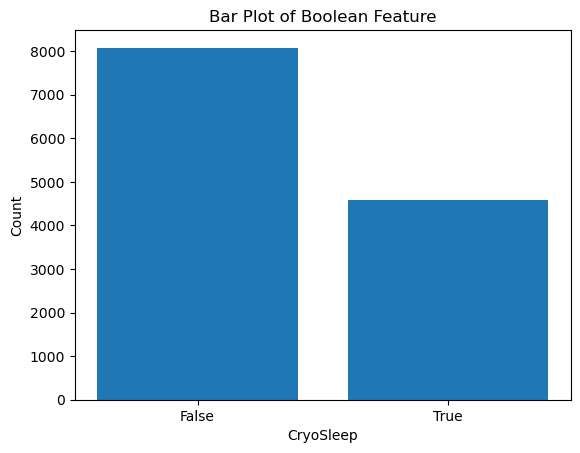

In [18]:
counts = df['CryoSleep'].value_counts()

# Plot the bar chart
plt.bar(counts.index.astype(str), counts)

# Add labels and title
plt.xlabel('CryoSleep')
plt.ylabel('Count')
plt.title('Bar Plot of Boolean Feature')

# Show the plot
plt.show()

In [19]:
#Since False values are dominating than True, we are replacing nan values with False

In [20]:
df['CryoSleep'].fillna(False,inplace=True)

In [21]:
df['CryoSleep'] = df['CryoSleep'].map({False: 0 , True : 1})

In [22]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,2,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,1,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,2,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,2,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,1,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [23]:
#Cabin

In [24]:
df.dropna(subset=['Cabin'],inplace=True)

In [25]:
df['Cabin'].astype(str).str[0].unique()

array(['B', 'F', 'A', 'G', 'E', 'D', 'C', 'T'], dtype=object)

In [26]:
df['Cabin'].astype(str).str.split('/')

0          [B, 0, P]
1          [F, 0, S]
2          [A, 0, S]
3          [A, 0, S]
4          [F, 1, S]
            ...     
4271    [F, 1796, S]
4272    [G, 1496, S]
4274     [D, 296, P]
4275     [D, 297, P]
4276    [G, 1498, S]
Name: Cabin, Length: 12671, dtype: object

In [27]:
df['Cabin'].astype(str).str.split('/').str[2].unique()

array(['P', 'S'], dtype=object)

In [28]:
#Working on splitting the cabin column into 2 columns with 1st and last
df['Cabin_1'] = df['Cabin'].astype(str).str.split('/').str[0]
df['Cabin_2'] = df['Cabin'].astype(str).str.split('/').str[2]

In [29]:
#Now dropping Cabin column
df.drop(['Cabin'],axis=1,inplace=True)

In [30]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_1,Cabin_2
0,2,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,1,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,2,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,2,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,1,0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S


In [31]:
#Probability ratio encoding for Cabin_1

In [32]:
# Assuming df is your DataFrame and 'category_column' is the categorical column you want to encode
# 'target_column' is the target variable

# Calculate the probability of target variable being 1 for each category
prob_target_1 = df.groupby('Cabin_1')['Transported'].mean()

# Calculate the probability of target variable being 0 for each category
prob_target_0 = 1 - prob_target_1

# Avoid division by zero and replace infinite values (if any) with a large number
prob_target_0 = prob_target_0.replace(0, 1e10)

# Calculate the Probability Ratio Encoding
prob_ratio_encoding = prob_target_1 / prob_target_0

# Map the encoding back to the original DataFrame
df['Cabin_1_encoded'] = df['Cabin_1'].map(prob_ratio_encoding)




In [33]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_1,Cabin_2,Cabin_1_encoded
0,2,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P,2.763285
1,1,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S,0.785304
2,2,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S,0.984496
3,2,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S,0.984496
4,1,0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S,0.785304


In [34]:
df.drop(['Cabin_1'],axis=1,inplace=True)

In [35]:
#One hot encoding for Cabin_2 

In [36]:
original_column = df['Cabin_2']
df = pd.get_dummies(df, columns=['Cabin_2'],drop_first=True)
df = pd.concat([df, original_column], axis=1)

In [37]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_1_encoded,Cabin_2_S,Cabin_2
0,2,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,2.763285,0,P
1,1,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0.785304,1,S
2,2,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0.984496,1,S
3,2,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0.984496,1,S
4,1,0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0.785304,1,S


In [38]:
df.drop(['Cabin_2'],axis=1,inplace=True)

In [39]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_1_encoded,Cabin_2_S
0,2,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,2.763285,0
1,1,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0.785304,1
2,2,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0.984496,1
3,2,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0.984496,1
4,1,0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0.785304,1


In [40]:
#Destination column

In [41]:
df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [42]:
df['Destination'].isnull().sum()

270

In [43]:
#df['Destination'].fillna('Missing',inplace=True)

In [44]:
df['Destination'].isnull().sum()

270

C:\Users\arany\AppData\Local\Temp\ipykernel_4840\807359217.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)


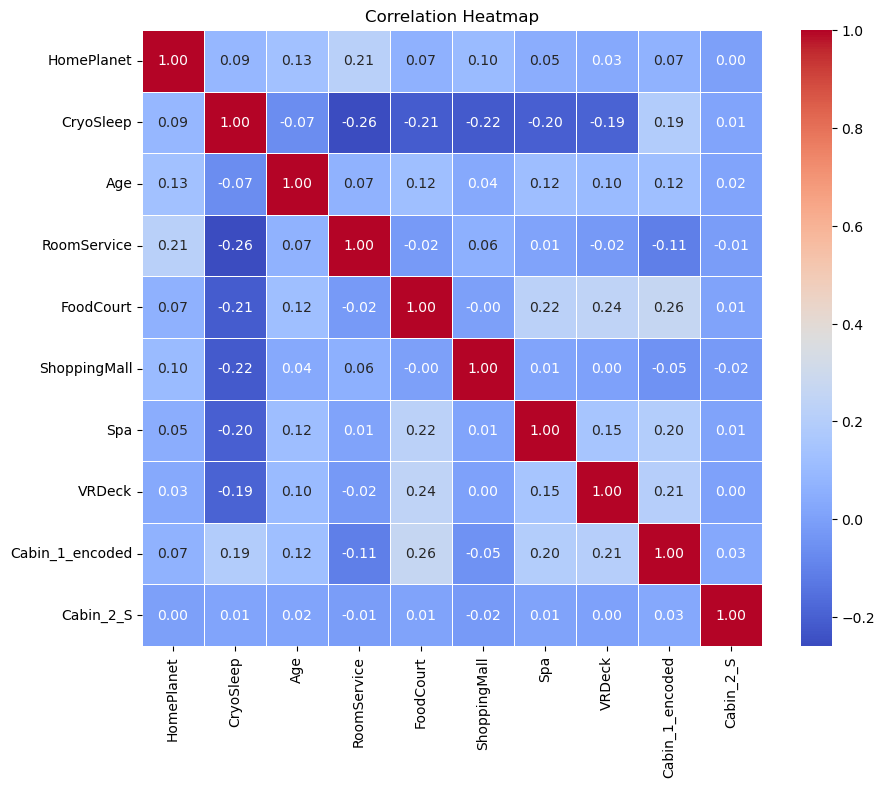

In [45]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

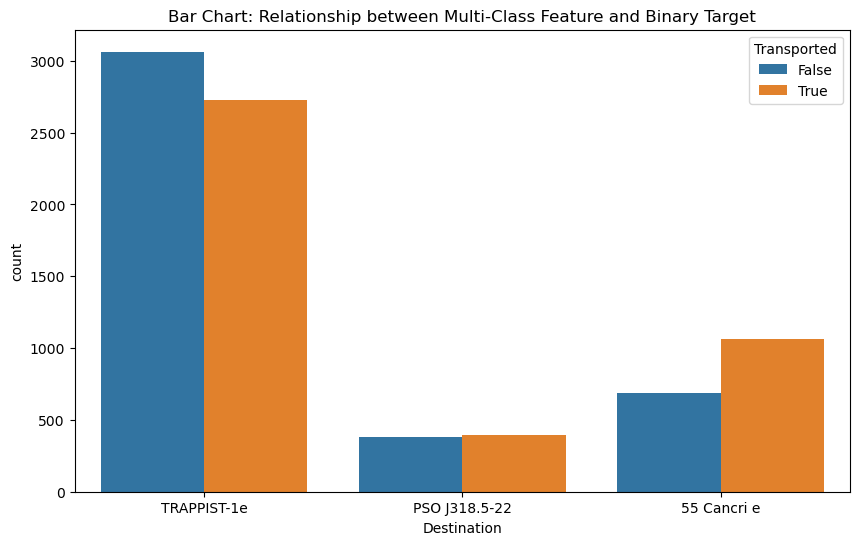

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Destination', hue='Transported', data=df)
plt.title('Bar Chart: Relationship between Multi-Class Feature and Binary Target')
plt.show()

In [50]:
#Since Trappsit -1e has very high count compared to other classes, we will fill missing values with that

In [51]:
df['Destination'].mode()

0    TRAPPIST-1e
Name: Destination, dtype: object

In [52]:
df['Destination'].fillna('TRAPPIST-1e',inplace=True)

In [53]:
df['Destination'].isnull().sum()

0

In [54]:
df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object)

C:\Users\arany\AppData\Local\Temp\ipykernel_4840\624004754.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)


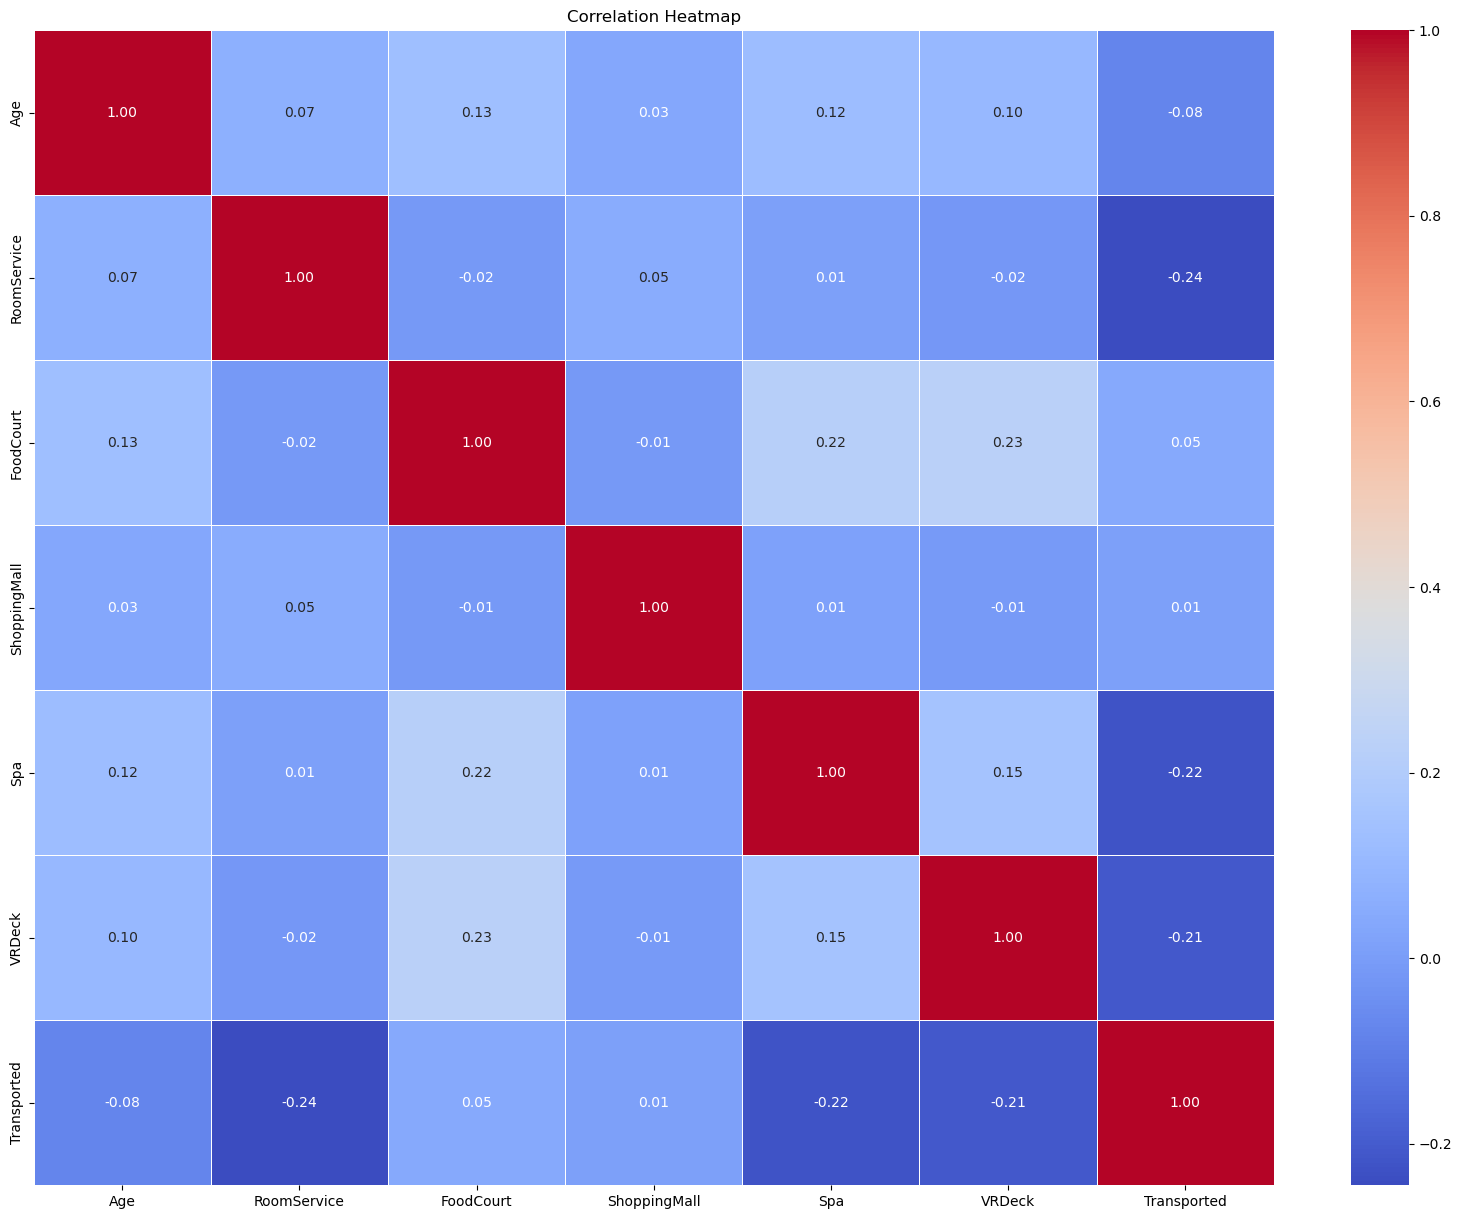

In [55]:
plt.figure(figsize=(20, 15))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

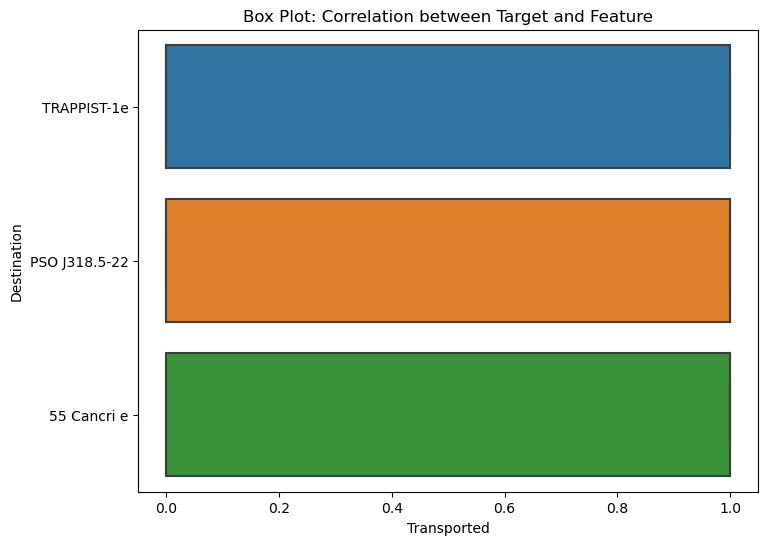

In [56]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Transported', y='Destination', data=df)
plt.title('Box Plot: Correlation between Target and Feature')
plt.show()

In [57]:
#Equal correlation between classes, hence we are choosing one hot encoding

In [58]:
df = pd.get_dummies(df,columns=['Destination'],drop_first=True)

In [59]:
df.head()

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_1_encoded,Cabin_2_S,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,2,0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,2.763285,0,0,1
1,1,0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0.785304,1,0,1
2,2,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0.984496,1,0,1
3,2,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0.984496,1,0,1
4,1,0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0.785304,1,0,1


In [60]:
#VIP

In [61]:
df['VIP'].isnull().sum()

285

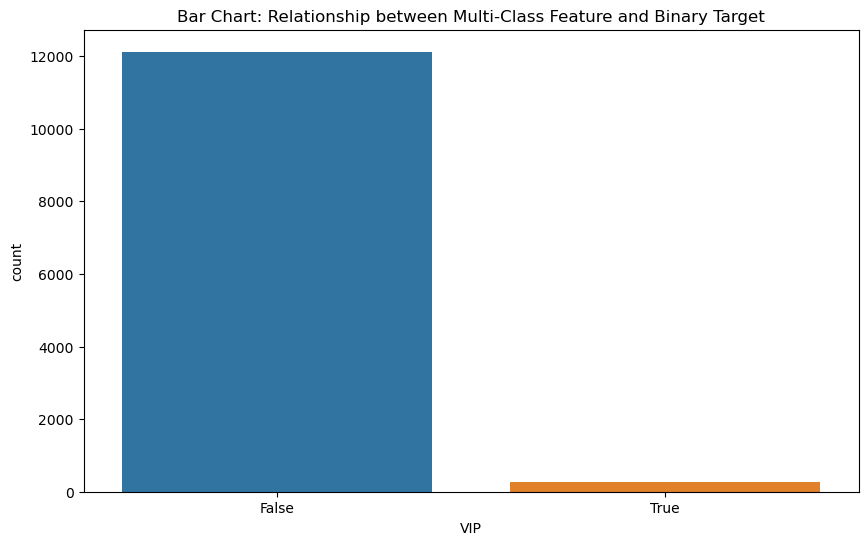

In [62]:
plt.figure(figsize=(10, 6))
sns.countplot(x='VIP', data=df)
plt.title('Bar Chart: Relationship between Multi-Class Feature and Binary Target')
plt.show()

In [63]:
#False values very more than True, so replacing Nan values with False

In [64]:
df['VIP'].fillna(False,inplace=True)

In [65]:
df['VIP'].isnull().sum()

0

In [66]:
df = pd.get_dummies(df,columns=['VIP'],drop_first=True)

In [67]:
df.head()

,HomePlanet,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_1_encoded,Cabin_2_S,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,2,0,39.0,0.0,0.0,0.0,0.0,0.0,False,2.763285,0,0,1,0
1,1,0,24.0,109.0,9.0,25.0,549.0,44.0,True,0.785304,1,0,1,0
2,2,0,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0.984496,1,0,1,1
3,2,0,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0.984496,1,0,1,0
4,1,0,16.0,303.0,70.0,151.0,565.0,2.0,True,0.785304,1,0,1,0


In [68]:
df.isnull().sum()

HomePlanet                      0
CryoSleep                       0
Age                           265
RoomService                   259
FoodCourt                     281
ShoppingMall                  301
Spa                           281
VRDeck                        264
Transported                  4177
Cabin_1_encoded                 0
Cabin_2_S                       0
Destination_PSO J318.5-22       0
Destination_TRAPPIST-1e         0
VIP_True                        0
dtype: int64

In [69]:
#Age

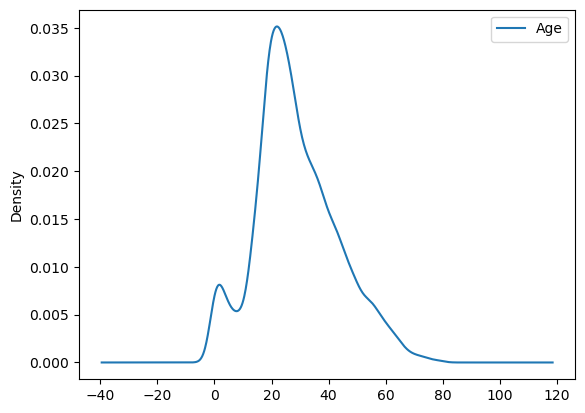

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [71]:
#Follows gaussian distribution, hence replacing Nan values with mean

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12671 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   HomePlanet                 12671 non-null  int64  
 1   CryoSleep                  12671 non-null  int64  
 2   Age                        12406 non-null  float64
 3   RoomService                12412 non-null  float64
 4   FoodCourt                  12390 non-null  float64
 5   ShoppingMall               12370 non-null  float64
 6   Spa                        12390 non-null  float64
 7   VRDeck                     12407 non-null  float64
 8   Transported                8494 non-null   object 
 9   Cabin_1_encoded            12671 non-null  float64
 10  Cabin_2_S                  12671 non-null  uint8  
 11  Destination_PSO J318.5-22  12671 non-null  uint8  
 12  Destination_TRAPPIST-1e    12671 non-null  uint8  
 13  VIP_True                   12671 non-null  uint

In [73]:
Age_mean = df.Age.mean()

In [74]:
df['Age'].fillna(Age_mean,inplace=True)

In [75]:
df.head()

,HomePlanet,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_1_encoded,Cabin_2_S,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,2,0,39.0,0.0,0.0,0.0,0.0,0.0,False,2.763285,0,0,1,0
1,1,0,24.0,109.0,9.0,25.0,549.0,44.0,True,0.785304,1,0,1,0
2,2,0,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0.984496,1,0,1,1
3,2,0,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0.984496,1,0,1,0
4,1,0,16.0,303.0,70.0,151.0,565.0,2.0,True,0.785304,1,0,1,0


In [76]:
#Room service

In [77]:
df['RoomService'].isnull().sum()

259

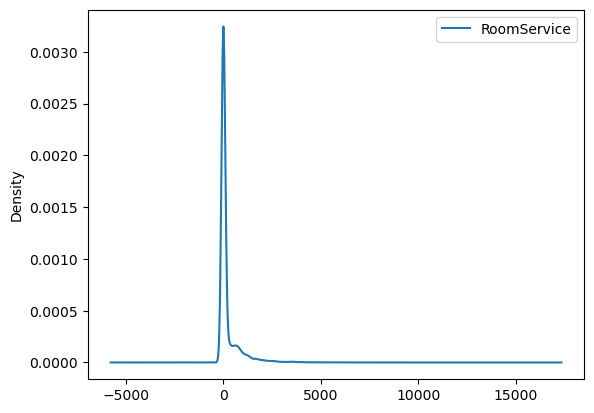

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['RoomService'].plot(kind='kde', ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [79]:
#Following gaussian distribution, replacing nan values with mean

In [80]:
RoomService_mean = df['RoomService'].mean()

In [81]:
df['RoomService'].fillna(RoomService_mean,inplace=True)

In [82]:
df.head()

,HomePlanet,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_1_encoded,Cabin_2_S,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,2,0,39.0,0.0,0.0,0.0,0.0,0.0,False,2.763285,0,0,1,0
1,1,0,24.0,109.0,9.0,25.0,549.0,44.0,True,0.785304,1,0,1,0
2,2,0,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0.984496,1,0,1,1
3,2,0,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0.984496,1,0,1,0
4,1,0,16.0,303.0,70.0,151.0,565.0,2.0,True,0.785304,1,0,1,0


In [83]:
#Food Court

In [84]:
df['FoodCourt'].isnull().sum()

281

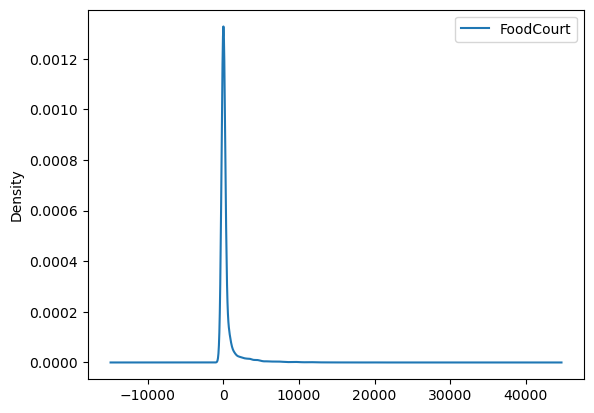

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['FoodCourt'].plot(kind='kde', ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [86]:
#Follows gaussian distribution, so replacing nan with mean

In [87]:
FoodCourt_mean = df['FoodCourt'].mean()

In [88]:
df['FoodCourt'].fillna(FoodCourt_mean,inplace=True)

In [89]:
df['FoodCourt'].isnull().sum()

0

In [90]:
#Shopping Mall

In [91]:
df['ShoppingMall'].isnull().sum()

301

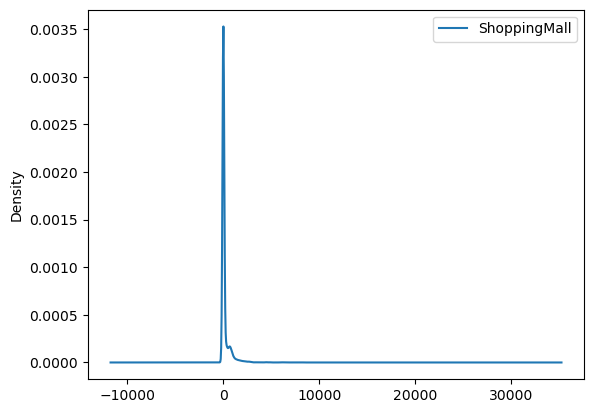

In [92]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['ShoppingMall'].plot(kind='kde', ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [93]:
#Follows gaussian distribution, so replacing nan with mean

In [94]:
ShoppingMall_mean = df['ShoppingMall'].mean()

In [95]:
df['ShoppingMall'].fillna(ShoppingMall_mean,inplace=True)

In [96]:
df['ShoppingMall'].isnull().sum()

0

In [97]:
#Spa

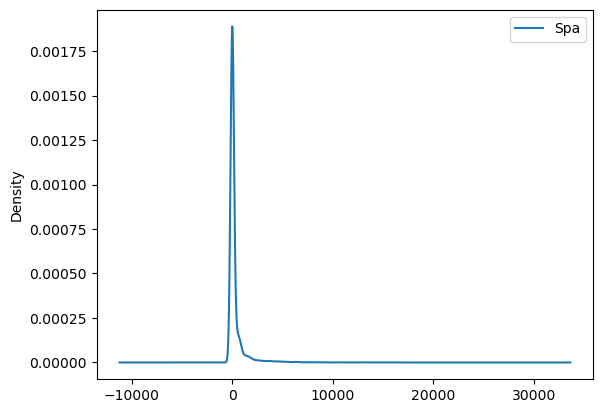

In [98]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Spa'].plot(kind='kde', ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [99]:
#Follows gaussian distribution, so replacing nan with mean

In [100]:
Spa_mean = df['Spa'].mean()

In [101]:
df['Spa'].fillna(Spa_mean,inplace=True)

In [102]:
df['Spa'].isnull().sum()

0

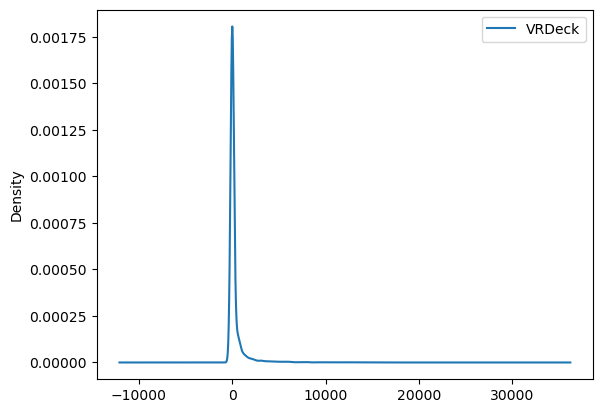

In [103]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['VRDeck'].plot(kind='kde', ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [104]:
VRDeck_mean = df['VRDeck'].mean()

In [105]:
df['VRDeck'].fillna(VRDeck_mean,inplace=True)

In [106]:
df['VRDeck'].isnull().sum()

0

In [107]:
df.isnull().sum()

HomePlanet                      0
CryoSleep                       0
Age                             0
RoomService                     0
FoodCourt                       0
ShoppingMall                    0
Spa                             0
VRDeck                          0
Transported                  4177
Cabin_1_encoded                 0
Cabin_2_S                       0
Destination_PSO J318.5-22       0
Destination_TRAPPIST-1e         0
VIP_True                        0
dtype: int64

In [108]:
#All missing values handled

In [109]:
#Normalization

In [110]:
df1 = df[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].copy()
df1.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0


In [111]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(df[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]),columns=['Age_scaled','RoomService_scaled','FoodCourt_scaled','ShoppingMall_scaled','Spa_scaled','VRDeck_scaled'])
df_minmax.head()

,Age_scaled,RoomService_scaled,FoodCourt_scaled,ShoppingMall_scaled,Spa_scaled,VRDeck_scaled
0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.303797,0.009423,0.000302,0.001064,0.024500,0.001823
2,0.734177,0.003717,0.119948,0.000000,0.299670,0.002030
3,0.417722,0.000000,0.043035,0.015793,0.148563,0.007997
4,0.202532,0.026195,0.002348,0.006428,0.025214,0.000083


In [112]:
for column in df_minmax.columns:
    df[column] = df_minmax[column]

In [113]:
df.head()

,HomePlanet,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_1_encoded,Cabin_2_S,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,Age_scaled,RoomService_scaled,FoodCourt_scaled,ShoppingMall_scaled,Spa_scaled,VRDeck_scaled
0,2,0,39.0,0.0,0.0,0.0,0.0,0.0,False,2.763285,0,0,1,0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0,24.0,109.0,9.0,25.0,549.0,44.0,True,0.785304,1,0,1,0,0.303797,0.009423,0.000302,0.001064,0.024500,0.001823
2,2,0,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0.984496,1,0,1,1,0.734177,0.003717,0.119948,0.000000,0.299670,0.002030
3,2,0,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0.984496,1,0,1,0,0.417722,0.000000,0.043035,0.015793,0.148563,0.007997
4,1,0,16.0,303.0,70.0,151.0,565.0,2.0,True,0.785304,1,0,1,0,0.202532,0.026195,0.002348,0.006428,0.025214,0.000083


In [114]:
df.drop(['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'],axis=1,inplace=True)

In [115]:
df.head()

,HomePlanet,CryoSleep,Transported,Cabin_1_encoded,Cabin_2_S,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,Age_scaled,RoomService_scaled,FoodCourt_scaled,ShoppingMall_scaled,Spa_scaled,VRDeck_scaled
0,2,0,False,2.763285,0,0,1,0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0,True,0.785304,1,0,1,0,0.303797,0.009423,0.000302,0.001064,0.024500,0.001823
2,2,0,False,0.984496,1,0,1,1,0.734177,0.003717,0.119948,0.000000,0.299670,0.002030
3,2,0,False,0.984496,1,0,1,0,0.417722,0.000000,0.043035,0.015793,0.148563,0.007997
4,1,0,True,0.785304,1,0,1,0,0.202532,0.026195,0.002348,0.006428,0.025214,0.000083


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12671 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   HomePlanet                 12671 non-null  int64  
 1   CryoSleep                  12671 non-null  int64  
 2   Transported                8494 non-null   object 
 3   Cabin_1_encoded            12671 non-null  float64
 4   Cabin_2_S                  12671 non-null  uint8  
 5   Destination_PSO J318.5-22  12671 non-null  uint8  
 6   Destination_TRAPPIST-1e    12671 non-null  uint8  
 7   VIP_True                   12671 non-null  uint8  
 8   Age_scaled                 12671 non-null  float64
 9   RoomService_scaled         12671 non-null  float64
 10  FoodCourt_scaled           12671 non-null  float64
 11  ShoppingMall_scaled        12671 non-null  float64
 12  Spa_scaled                 12671 non-null  float64
 13  VRDeck_scaled              12671 non-null  floa

In [117]:
#After performing preprocessing, we are again splitting back test and train datasets on basis of null value in target column
df_test = df[df['Transported'].isnull()]
df_train = df[df['Transported'].notnull()]

In [118]:
df_test.isnull().sum()

HomePlanet                      0
CryoSleep                       0
Transported                  4177
Cabin_1_encoded                 0
Cabin_2_S                       0
Destination_PSO J318.5-22       0
Destination_TRAPPIST-1e         0
VIP_True                        0
Age_scaled                      0
RoomService_scaled              0
FoodCourt_scaled                0
ShoppingMall_scaled             0
Spa_scaled                      0
VRDeck_scaled                   0
dtype: int64

In [119]:
df_train.isnull().sum()

HomePlanet                   0
CryoSleep                    0
Transported                  0
Cabin_1_encoded              0
Cabin_2_S                    0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
VIP_True                     0
Age_scaled                   0
RoomService_scaled           0
FoodCourt_scaled             0
ShoppingMall_scaled          0
Spa_scaled                   0
VRDeck_scaled                0
dtype: int64

In [120]:
#Converting Transported target variable to 1 and 0 for applying binary classification

In [121]:
df_train['Transported'] = df_train['Transported'].astype(int)

C:\Users\arany\AppData\Local\Temp\ipykernel_4840\1083317624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Transported'] = df_train['Transported'].astype(int)


In [122]:
#Model Selection

In [123]:
#Trying logistic regression

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [125]:
X = df_train.drop(['Transported'],axis=1)
y = df_train['Transported']

In [126]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [128]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [129]:
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.72
Confusion Matrix:
[[700 153]
 [317 529]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.82      0.75       853
           1       0.78      0.63      0.69       846

    accuracy                           0.72      1699
   macro avg       0.73      0.72      0.72      1699
weighted avg       0.73      0.72      0.72      1699



In [130]:
#Trying Decision tree

In [131]:
from sklearn.tree import DecisionTreeClassifier

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [134]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [135]:
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.63
Confusion Matrix:
[[534 319]
 [305 541]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.63      0.63       853
           1       0.63      0.64      0.63       846

    accuracy                           0.63      1699
   macro avg       0.63      0.63      0.63      1699
weighted avg       0.63      0.63      0.63      1699



Lesser accuracy and F1 scores than Logistic regression

In [136]:
#Trying Random Forest Classifier

In [137]:
from sklearn.ensemble import RandomForestClassifier

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [140]:
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.63
Confusion Matrix:
[[534 319]
 [305 541]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.63      0.63       853
           1       0.63      0.64      0.63       846

    accuracy                           0.63      1699
   macro avg       0.63      0.63      0.63      1699
weighted avg       0.63      0.63      0.63      1699



Again lower accuracy and F1 score than Logistic Regression

In [141]:
#Trying KNN

In [142]:
from sklearn.neighbors import KNeighborsClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

NameError: name 'StandardScaler' is not defined

In [ ]:
# Initialize the KNN model
k = 52  # Number of neighbors
model = KNeighborsClassifier(n_neighbors=k)

# Train the model on the training set
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = model.predict(X_test_scaled)


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)


Accuracy: 0.71
Confusion Matrix:
[[719 134]
 [352 494]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.84      0.75       853
           1       0.79      0.58      0.67       846

    accuracy                           0.71      1699
   macro avg       0.73      0.71      0.71      1699
weighted avg       0.73      0.71      0.71      1699



K value set as odd , for binary classification and near to square root of total number of samples in train dataset

In [ ]:
#Trying grid search view to get best accuracy

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': list(range(1, 100))}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_k = grid_search.best_params_['n_neighbors']


In [ ]:
best_k

52

In [ ]:
from xgboost import XGBClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the XGBoost model
model = XGBClassifier(random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)


Accuracy: 0.68
Confusion Matrix:
[[638 215]
 [321 525]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.75      0.70       853
           1       0.71      0.62      0.66       846

    accuracy                           0.68      1699
   macro avg       0.69      0.68      0.68      1699
weighted avg       0.69      0.68      0.68      1699



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the neural network model
model = Sequential()

# Add input layer and hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Add output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training set
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)


Epoch 1/50
170/170 [==============================] - 1s 3ms/step - loss: 0.6054 - accuracy: 0.6851 - val_loss: 0.5698 - val_accuracy: 0.7167
Epoch 2/50
170/170 [==============================] - 0s 2ms/step - loss: 0.5584 - accuracy: 0.7150 - val_loss: 0.5627 - val_accuracy: 0.7093
Epoch 3/50
170/170 [==============================] - 0s 2ms/step - loss: 0.5505 - accuracy: 0.7176 - val_loss: 0.5573 - val_accuracy: 0.7138
Epoch 4/50
170/170 [==============================] - 0s 2ms/step - loss: 0.5456 - accuracy: 0.7163 - val_loss: 0.5588 - val_accuracy: 0.7086
Epoch 5/50
170/170 [==============================] - 0s 2ms/step - loss: 0.5424 - accuracy: 0.7206 - val_loss: 0.5569 - val_accuracy: 0.7116
Epoch 6/50
170/170 [==============================] - 0s 2ms/step - loss: 0.5409 - accuracy: 0.7208 - val_loss: 0.5556 - val_accuracy: 0.7145
Epoch 7/50
170/170 [==============================] - 0s 2ms/step - loss: 0.5395 - accuracy: 0.7209 - val_loss: 0.5542 - val_accuracy: 0.7160
Epoch 

In [ ]:
#Trying SVM 

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler  # SVMs often benefit from feature scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize features (SVMs often benefit from feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize the SVM model
model = SVC(kernel='linear', random_state=42)  # You can also use other kernels like 'rbf'

# Train the model on the training set
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = model.predict(X_test_scaled)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.73
Confusion Matrix:
[[753 100]
 [358 488]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.88      0.77       853
           1       0.83      0.58      0.68       846

    accuracy                           0.73      1699
   macro avg       0.75      0.73      0.72      1699
weighted avg       0.75      0.73      0.72      1699



SVM giving the best accuracy here

Best accuracy so far - checked all kernels(linear,poly,rbf,sigmoid) : linear giving the best results

In [ ]:
#Creating a pickle file

In [ ]:
import pickle
pickle.dump(model,open('model.pkl','wb'))
pickled_model = pickle.load(open('model.pkl','rb'))